# Análisis del efecto de las optimizaciones en el modelo que trabaja con datos de imagen
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from image_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/image"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/preprocessed image/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/MicroImgDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModel.tflite".
Model size 131.6796875 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


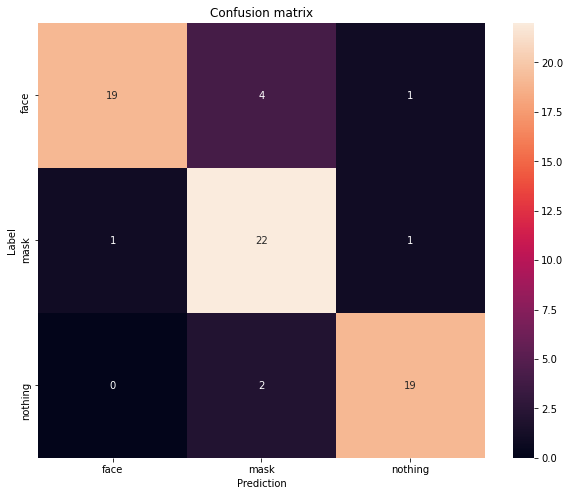

              precision    recall  f1-score   support

        face    0.95000   0.79167   0.86364        24
        mask    0.78571   0.91667   0.84615        24
     nothing    0.90476   0.90476   0.90476        21

    accuracy                        0.86957        69
   macro avg    0.88016   0.87103   0.87152        69
weighted avg    0.87909   0.86957   0.87007        69

Average time: 0.9851870329483695 ms
Max time: 1.9183158874511719 ms
Min time: 0.8370876312255859 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, label_index_path, [micro_data_test_dir])

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQuant.tflite".
Model size 45.578125 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


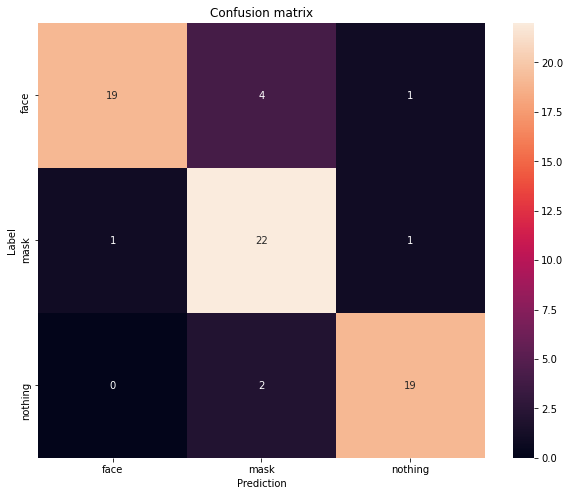

              precision    recall  f1-score   support

        face    0.95000   0.79167   0.86364        24
        mask    0.78571   0.91667   0.84615        24
     nothing    0.90476   0.90476   0.90476        21

    accuracy                        0.86957        69
   macro avg    0.88016   0.87103   0.87152        69
weighted avg    0.87909   0.86957   0.87007        69

Average time: 9.658481763756793 ms
Max time: 35.02941131591797 ms
Min time: 8.70656967163086 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, label_index_path, [micro_data_test_dir], quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test de datos
captados con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQAT.tflite".
Model size 45.5 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


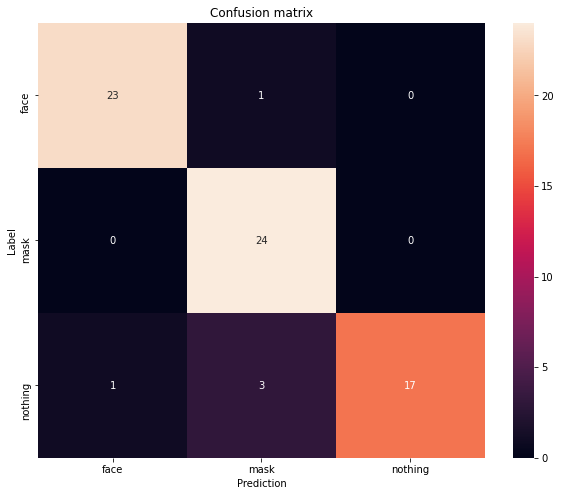

              precision    recall  f1-score   support

        face    0.95833   0.95833   0.95833        24
        mask    0.85714   1.00000   0.92308        24
     nothing    1.00000   0.80952   0.89474        21

    accuracy                        0.92754        69
   macro avg    0.93849   0.92262   0.92538        69
weighted avg    0.93582   0.92754   0.92671        69

Average time: 8.943744327711022 ms
Max time: 12.150049209594727 ms
Min time: 8.646011352539062 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, label_index_path, [micro_data_test_dir], quantized=True)